<a href="https://colab.research.google.com/github/ASO2001052/AI_teach2020/blob/master/2020AI030A_family_mosaic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import cv2
import urllib.request as req

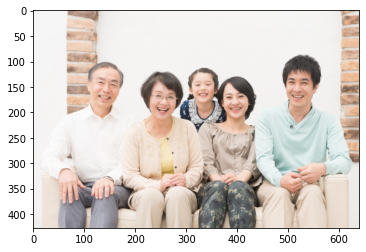

In [2]:
url="https://raw.githubusercontent.com/masatokg/sample_photo/master/familyface001.PNG"
savefile="family.png"
req.urlretrieve(url, savefile)
img = cv2.imread(savefile)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

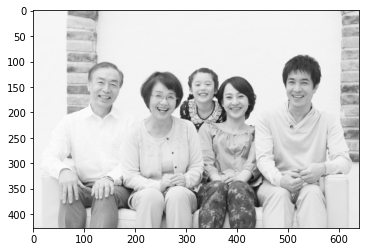

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
url="https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml"
cascade_file="cascade_file.xml"
req.urlretrieve(url, cascade_file)
cascade = cv2.CascadeClassifier(cascade_file)

In [5]:
face_list=cascade.detectMultiScale(img_gray, minSize=(50,50))
if len(face_list) == 0:
  print("検出数はゼロでした")
else:
  print("検出数：", len(face_list), "件")

検出数： 5 件


In [6]:
for(x,y,w,h) in face_list:
  print("顔の座標：x=",x, " y=",y, " 横幅w=",w, " 縦幅h=",h)
  blue=(255,0,0)
  cv2.rectangle(img, (x,y), (x+w, y+h), blue, thickness=10)

顔の座標：x= 487  y= 117  横幅w= 66  縦幅h= 66
顔の座標：x= 112  y= 118  横幅w= 67  縦幅h= 67
顔の座標：x= 304  y= 122  横幅w= 58  縦幅h= 58
顔の座標：x= 226  y= 146  横幅w= 62  縦幅h= 62
顔の座標：x= 367  y= 148  横幅w= 59  縦幅h= 59


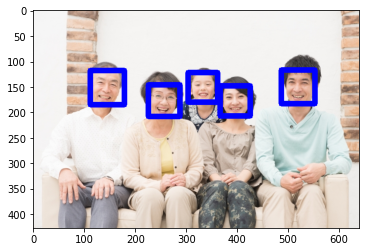

In [7]:
cv2.imwrite("face-deeteect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
#モザイク処理
def mosaic(img, rect, size):
  (x1, y1, x2, y2) = rect
  w = x2 - x1
  h = y2 - y1
  i_rect = img[y1:y2, x1:x2]
  i_small = cv2.resize(i_rect, (size, size))
  i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
  img2 = img.copy()
  img2[y1:y2, x1:x2] = i_mos
  return img2

5 件見つかりました


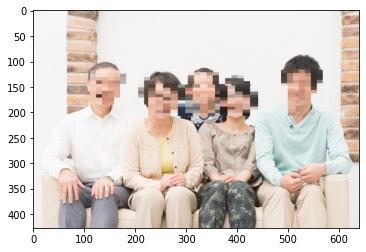

In [9]:
cascade =  cv2.CascadeClassifier(cascade_file)
url = "https://raw.githubusercontent.com/masatokg/sample_photo/master/familyface001.PNG"
family_file = "family.png"
req.urlretrieve(url, family_file)
img_family = cv2.imread(family_file)
img_family_gray = cv2.cvtColor(img_family, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_family_gray, cv2.COLOR_BGR2RGB))

face_list = cascade.detectMultiScale(img_family_gray, minSize=(50, 50))
if len(face_list)==0: print("顔が見つかりません")
else : print(len(face_list), "件見つかりました")

for(x,y,w,h) in face_list:
  img_family = mosaic(img_family, (x,y,x+y,y+h), 10)
cv2.imwrite("family-mosaic.png", img_family)
plt.imshow(cv2.cvtColor(img_family, cv2.COLOR_BGR2RGB))
plt.show()